Multipel linjär regression
\begin{equation}
    \mu_{Y|\alpha_1,\alpha_2,\alpha_3} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1x_2
\end{equation}

\begin{equation*}
    \mathbf{Y} = X\boldsymbol\beta + \mathbf{E}
\end{equation*}
där $X$ är modellspecifikations matrisen. $\mathbf{E}$ är vektorn med stokastiska fel med avseende på väntevärdet och $\mathbf{Y}$ är en respons vektor för $Y$ över hela stickprovet.

In [35]:
import pandas as pd

data_path = "/home/raphael/Documents/iths/data/"

adv = pd.read_csv(data_path+"Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
import numpy as np
test_df = pd.DataFrame(adv[:10])
X_test = np.column_stack([np.ones(10),test_df['TV'], test_df['radio'], test_df['TV']*test_df['radio']])
Y_test = test_df['sales']
train_df = pd.DataFrame(adv[10:160])
X_train = np.column_stack([np.ones(150),train_df['TV'], train_df['radio'], train_df['TV']*train_df['radio']])
Y_train = train_df['sales']
val_df = pd.DataFrame(adv[160:])
X_val = np.column_stack([np.ones(40),val_df['TV'], val_df['radio'], val_df['TV']*val_df['radio']])
Y_val= val_df['sales']

\begin{equation*}
\hat{\mathbf{\beta}} = (X^TX)^{-1}X^TY
\end{equation*}
SSE
\begin{equation}
\sum_{i=1}^n[y_i - (b_0 + b_1 x_{1i} + ... + b_k x_{ki})]²
\end{equation}

In [37]:
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train
k = len(b)-1
n = Y_train.shape[0]
SSE = np.sum(np.square(Y_val - (X_val @ b)))
var = SSE/(n-k-1)
S = np.sqrt(var)
Syy = (n*np.sum(np.square(Y_val)) - np.square(np.sum(Y_val)))/n
SSR = Syy - SSE
#SSE = Syy - SSR
#SSR_2 = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n

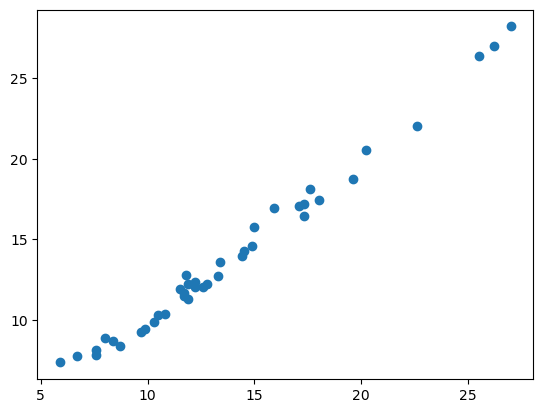

In [38]:
import matplotlib.pyplot as plt

plt.scatter(Y_val, X_val @ b)

In [39]:
b

array([6.88157647e+00, 1.86678349e-02, 2.42869419e-02, 1.10431159e-03])

In [40]:
Rsq = SSR/Syy
Rsq
# Choose 90% as confidence level

0.9977033993820288

In [41]:
import scipy.stats as stats
# H0: all β = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)
p_significance
# We reject the null-hypothesis, regression IS significant

7.291164286317912e-157

Variance/Co-variance matrix:
\begin{equation*}
c = (X^TX)^{-1}\sigma^2
\end{equation*}

In [42]:
c = np.linalg.pinv(X_train.T @ X_train)*var

# H0: b3 is irrelevant, β3 = 0
b3_statistic = b[3] / (S*np.sqrt(c[3, 3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3

1.4038828178352977e-162

In [45]:
RSE = np.sqrt((1/(n-2))*SSE)
RSE

0.32241658960079567

In [46]:
SSE_test= np.sum(np.square(Y_test - (X_test @ b)))
RSE_test = np.sqrt((1/(n-2))*SSE_test)
RSE, RSE_test

(0.32241658960079567, 0.2724138457509379)